In [2]:
import numpy as np
import laserhockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

# Informatoin about Hockey ENV

### Observation Space
 0  x pos player one
 
 1  y pos player one

 2  angle player one

 3  x vel player one

 4  y vel player one

 5  angular vel player one

 6  x player two

 7  y player two

 8  angle player two

 9 y vel player two

 10 y vel player two

 11 angular vel player two

 12 x pos puck

 13 y pos puck


 14 x vel puck

 15 y vel puck

 Keep Puck Mode

 16 time left player has puck
 
 17 time left other player has puck

### There is a Mode where one can keep the puck as long as one wants and there is the "Keep Puck Mode" where you have only a certain time. The later ist the default mode.

### Action Space

0 linear force in x-direction

1 linear force in y-direction 

2 torque

Keep Puck Mode

3 shoot puck


### Human Opponent
If you play with the arrow keys, only one action is possible at a time with a maximum value input. (see https://github.com/martius-lab/laser-hockey-env/blob/master/laserhockey/hockey_env.py line 759)

Maybe it is better to allow combinations of actions and vaiable strength -> continuous agent

But maybe not, since it is harder to optimze

In [3]:
np.set_printoptions(suppress=True)

In [4]:
reload(h_env)

/Users/londonbielicke/miniconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/Users/londonbielicke/miniconda3/lib/python3.10/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'laserhockey.hockey_env' from '/Users/londonbielicke/miniconda3/lib/python3.10/site-packages/laserhockey/hockey_env.py'>

# Normal Game Play

In [5]:
env = h_env.HockeyEnv()
print(env.observation_space)
print(env.action_space)

Box(-inf, inf, (18,), float32)
Box(-1.0, 1.0, (8,), float32)


have a look at the initialization condition: alternating who starts and are random in puck position

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [7]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)  
    print(a1)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break


[-0.92857674 -0.20076578  0.19029966  0.96763592]
[0.61629275 0.33775201 0.69309451 0.7030755 ]
[-0.23248251 -0.45539748  0.41752371 -0.45909738]
[-0.26277288 -0.86530774 -0.11383366  0.24213559]
[0.0000982  0.49803787 0.78208023 0.93273964]
[ 0.56209625 -0.01905659  0.49227759 -0.47428356]
[ 0.66508137 -0.41474397 -0.28264219 -0.21776896]
[-0.28469251 -0.39361873 -0.38487766 -0.32112286]
[ 0.11433034  0.86353405 -0.63076524  0.87223919]
[-0.63462626  0.49315582 -0.20910537 -0.11362228]
[-0.74143468 -0.97699347 -0.48724508 -0.24166615]
[ 0.72529074  0.80263147  0.83291549 -0.41383908]
[ 0.49046464 -0.70868826  0.53651099  0.83434355]
[ 0.09363426  0.84109975 -0.02882305 -0.92646837]
[-0.24320918 -0.46733212  0.90754661  0.98815456]
[ 0.6506699   0.58275118  0.2649328  -0.2119664 ]
[ 0.76380834  0.20201883 -0.0570388  -0.4547574 ]
[ 0.16121327 -0.61825959 -0.04407454 -0.0687603 ]
[-0.27603492  0.60379176 -0.83619756 -0.09780729]
[ 0.61084106 -0.29372375 -0.41393454  0.08666861]
[ 0.8752

[ 0.91715979  0.03488537 -0.62922158 -0.89600583]
[ 0.35536952 -0.09447598  0.44704696 -0.06485294]
[0.33567029 0.45025265 0.88340306 0.56806276]
[-0.42318452  0.0300536  -0.5789455   0.29839272]
[ 0.31040436  0.38664738 -0.70319452  0.43921268]
[ 0.56975896 -0.73983589 -0.20910615  0.94866592]
[-0.32372633 -0.4140406   0.49855263 -0.36226963]
[-0.85374124  0.82510285 -0.83959207  0.53049702]
[-0.62285585  0.70752195 -0.92670714  0.07481485]
[ 0.34438102 -0.80541423 -0.92547722 -0.61840106]
[-0.85588039 -0.88692176  0.8973326   0.49894067]
[ 0.70004019  0.9959548   0.12509173 -0.82911437]
[ 0.08212546 -0.10160406  0.72920034 -0.66772149]
[ 0.10851431 -0.50038334 -0.96620412 -0.59469539]
[-0.29516266  0.88925496 -0.58721418  0.56155234]
[0.6611122  0.83727444 0.55014221 0.341645  ]
[-0.56987923  0.79908357 -0.42879853 -0.3121913 ]
[ 0.36032834  0.44250803 -0.41876974  0.92462308]
[-0.46598505 -0.61504154 -0.52498349  0.22655685]
[ 0.34608421  0.00867047 -0.71256259  0.49222314]
[-0.7913

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [32]:
info

{'winner': 1,
 'reward_closeness_to_puck': 0,
 'reward_touch_puck': 0.0,
 'reward_puck_direction': 0.0028044488525390625}

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [33]:
env.close()

# Train Shooting

In [34]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [43]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, _ , info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [ ]:
env.close()

# Train DEFENDING

In [26]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)

In [28]:
o, info = env.reset()
_ = env.render()

for i in range(600):
    ob, info = env.reset()
    for _ in range(60):
        env.render()
        a1 = [.1,1,1,1] # np.random.uniform(-1,1,3)
        a2 = [0,0.,0,0] 
        obs, r, d,_, info = env.step(np.hstack([a1,a2]))
        print(r)
        obs_agent2 = env.obs_agent_two()
        if d: break

0
0
-0.5155753443836786
-0.4280485460162891
-0.3751651662921665
-0.3430400382174094
-0.3370612601885483
-0.3536772195327837
-0.3796462693630043
-0.4287997586719196
-10.494299520498608
-0.6177060087076462
-0.4418626410579936
-0.29782805104497884
-0.18100340283403943
-0.09555919949288545
-0.1740840642761652
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.48729401686775153
-0.4517636454519574
-0.4292977743559638
-0.42485846607522026
-0.4384697673313705
-0.46778710361935905
-0.5106732677860761
-0.5636345948020254
0
-0.4661945291522736
-0.32434798187090536
-0.2116385758705497
-0.1304805331750058
-0.0939665071974864
-0.17395249992370826
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-0.5488930907983068
-0.4044594875521407
-0.31618789948147247
-0.2834866404116518
-0.29411077948453396
-0.3300180728387332
-0.38293776131134727
-10.449198790801358
-0.49960078885764525
-0.3271312115517474
-0.1

KeyboardInterrupt: 

In [29]:
env.close()

# Using discrete actions

In [8]:
import random

In [9]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [16]:
env.reset()
for _ in range(200):
    env.render()
    print(random.randint(0,7))
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    print(a1)
    a2 = [0,0.,0,0 ] 
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

0
a1 [0, 0, -1, False]
[0, 0, 0, True]
6
a1 [0, 0, 0, True]
[0, -1, 0, False]
2
a1 [0, -1, 0, False]
[-1, 0, 0, False]
4
a1 [-1, 0, 0, False]
[0, 0, 0, False]
7
a1 [0, 0, 0, False]
[1, 0, 0, False]
6
a1 [1, 0, 0, False]
[0, -1, 0, False]
6
a1 [0, -1, 0, False]
[-1, 0, 0, False]
0
a1 [-1, 0, 0, False]
[0, 0, 0, True]
2
a1 [0, 0, 0, True]
[0, 0, 1, False]
7
a1 [0, 0, 1, False]
[0, 1, 0, False]
7
a1 [0, 1, 0, False]
[1, 0, 0, False]
4
a1 [1, 0, 0, False]
[-1, 0, 0, False]
2
a1 [-1, 0, 0, False]
[0, -1, 0, False]
5
a1 [0, -1, 0, False]
[0, 0, -1, False]
6
a1 [0, 0, -1, False]
[0, 1, 0, False]
3
a1 [0, 1, 0, False]
[1, 0, 0, False]
1
a1 [1, 0, 0, False]
[0, 0, 0, True]
7
a1 [0, 0, 0, True]
[-1, 0, 0, False]
5
a1 [-1, 0, 0, False]
[0, 0, 1, False]
7
a1 [0, 0, 1, False]
[0, 0, 1, False]
7
a1 [0, 0, 1, False]
[1, 0, 0, False]
1
a1 [1, 0, 0, False]
[-1, 0, 0, False]
5
a1 [-1, 0, 0, False]
[-1, 0, 0, False]
2
a1 [-1, 0, 0, False]
[0, 1, 0, False]
1
a1 [0, 1, 0, False]
[0, 0, -1, False]
0
a1 [0, 

In [ ]:
env.close()

# Hand-crafted Opponent

In [57]:
env = h_env.HockeyEnv()

In [58]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [60]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(250):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [61]:
np.mean(obs_buffer,axis=0)

array([-2.12386154, -0.08451513, -0.03575494, -0.05786233,  0.05146187,
       -0.16289074,  2.85298973, -0.09314194,  0.03546824, -0.00578199,
       -0.04650765, -0.02082041,  0.55499565, -0.21531226,  0.37932707,
       -0.89474394,  1.68      ,  1.26      ])

In [62]:
np.std(obs_buffer,axis=0)

array([ 1.20937969,  0.56740473,  0.65614896,  4.57029534,  3.77917972,
        3.27725322,  0.57985812,  0.37711888,  0.14472327,  3.50542317,
        1.34537328,  0.7138057 ,  1.7929023 ,  1.2691233 , 16.63316537,
        9.28411951,  4.01716318,  3.55420877])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [63]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [65]:
import pylab as plt

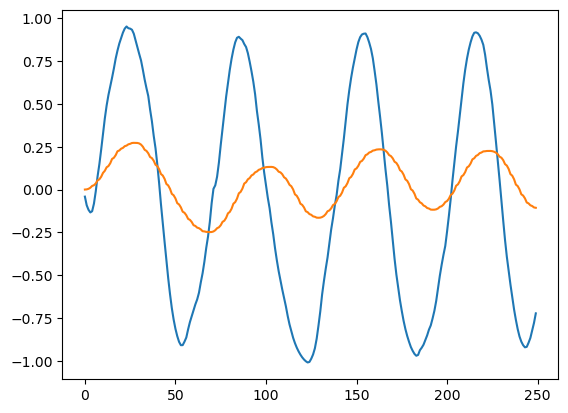

In [66]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

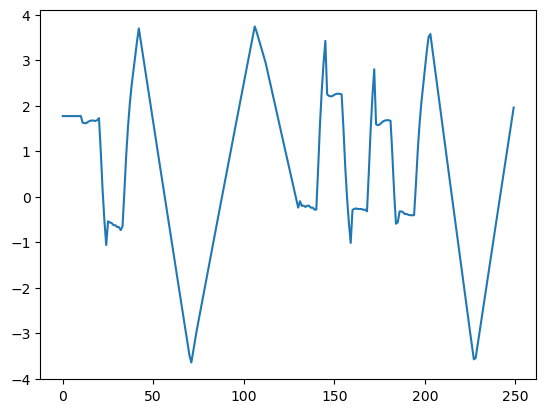

In [67]:
plt.plot(obs_buffer[:,12])

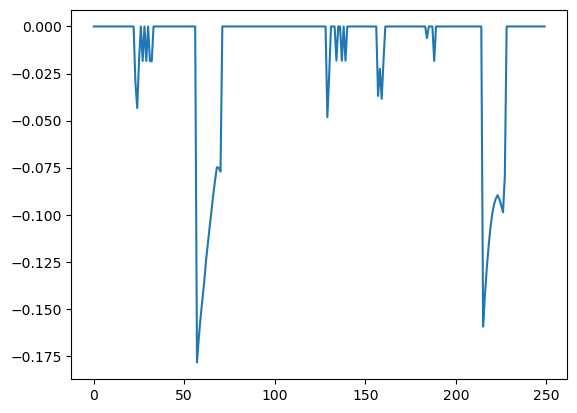

In [68]:
plt.plot(reward_buffer[:])

In [69]:
np.sum(reward_buffer)

-3.450028876848684

In [70]:
env.close()

# Human Opponent

In [71]:
env = h_env.HockeyEnv()

In [72]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [73]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [77]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(1000):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [78]:
env.close()